<a href="https://colab.research.google.com/github/brysonchristensen/IS-4487/blob/main/Assignments/assignment_4_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 4 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_4_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AdviseInvest Data Dictionary

| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |


### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [2]:
# Import libraries
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## Step 1: Initial Data Understanding

 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [6]:
# Import data
df = pd.read_csv('/content/adviseinvest_historical_data.csv')
display(df.head())

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [7]:
# Describe the dataframe
display(df.info())
display(df.describe())

# Check for missing values
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


None

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


,0
answered,0
income,0
female,0
age,0
job,0
num_dependents,0
rent,0
own_res,0
new_car,2
chk_acct,0


Number of duplicate rows: 29035


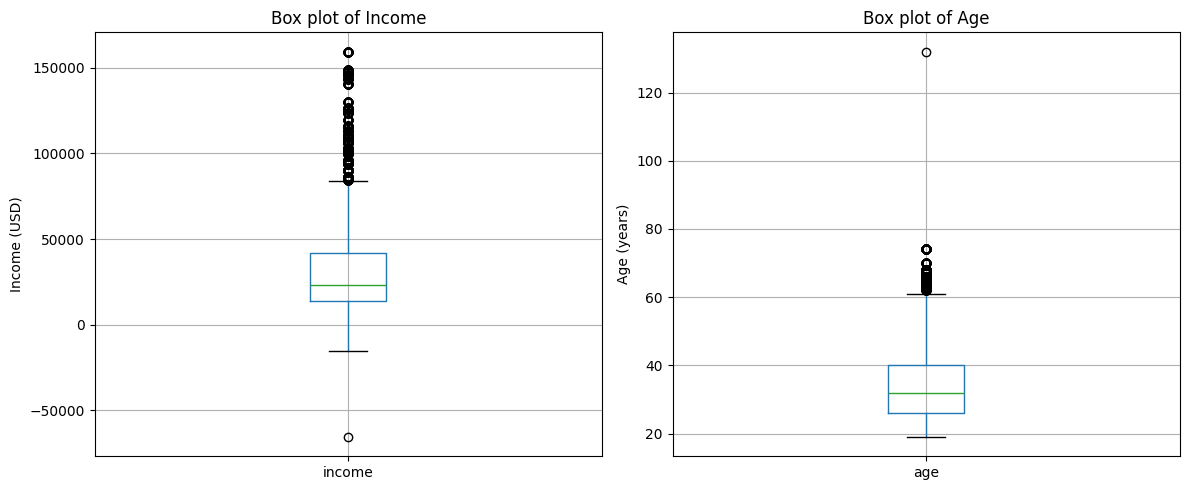

In [8]:
# Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Visualize outliers in 'income' and 'age' using box plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
df.boxplot(column='income')
plt.title('Box plot of Income')
plt.ylabel('Income (USD)')

plt.subplot(1, 2, 2)
df.boxplot(column='age')
plt.title('Box plot of Age')
plt.ylabel('Age (years)')

plt.tight_layout()
plt.show()

# Step 2: Exploratory Data Analysis (EDA)
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

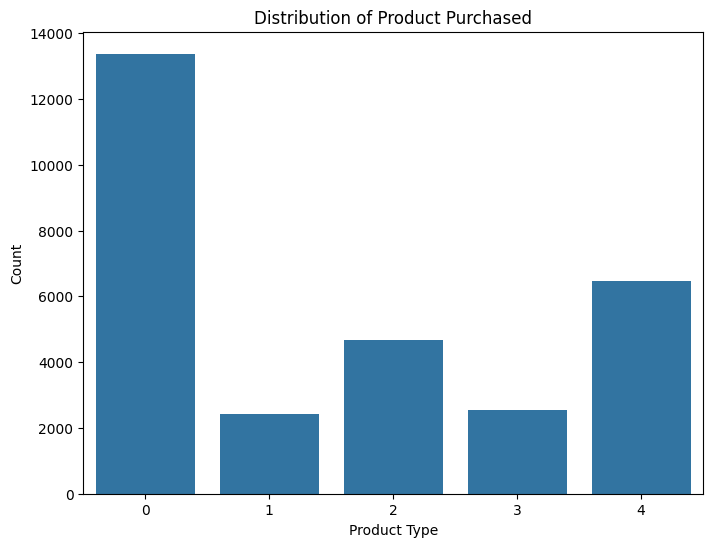

In [9]:
import seaborn as sns

# Chart 1: Distribution of the target variable 'product'
plt.figure(figsize=(8, 6))
sns.countplot(x='product', data=df)
plt.title('Distribution of Product Purchased')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()

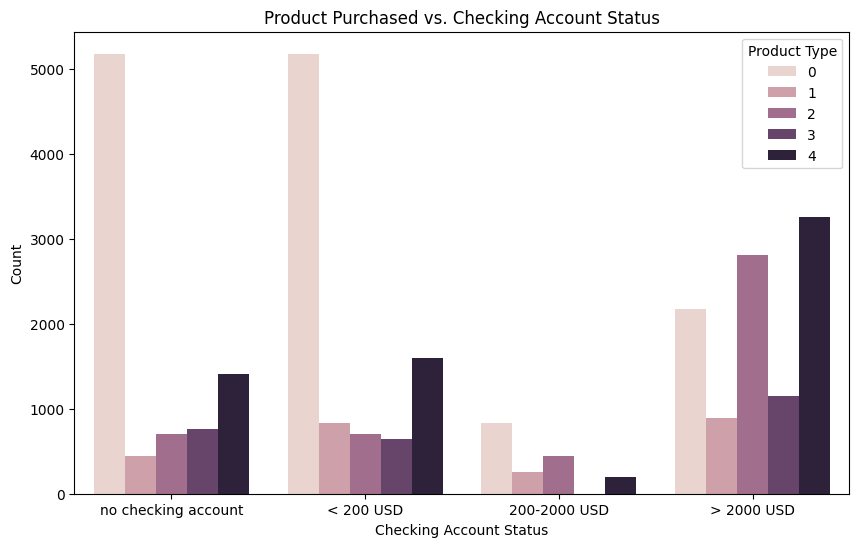

In [13]:
# Chart 5: Relationship between 'chk_acct' and 'product'
plt.figure(figsize=(10, 6))
sns.countplot(x='chk_acct', hue='product', data=df)
plt.title('Product Purchased vs. Checking Account Status')
plt.xlabel('Checking Account Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['no checking account', '< 200 USD', '200-2000 USD', '> 2000 USD'])
plt.legend(title='Product Type')
plt.show()

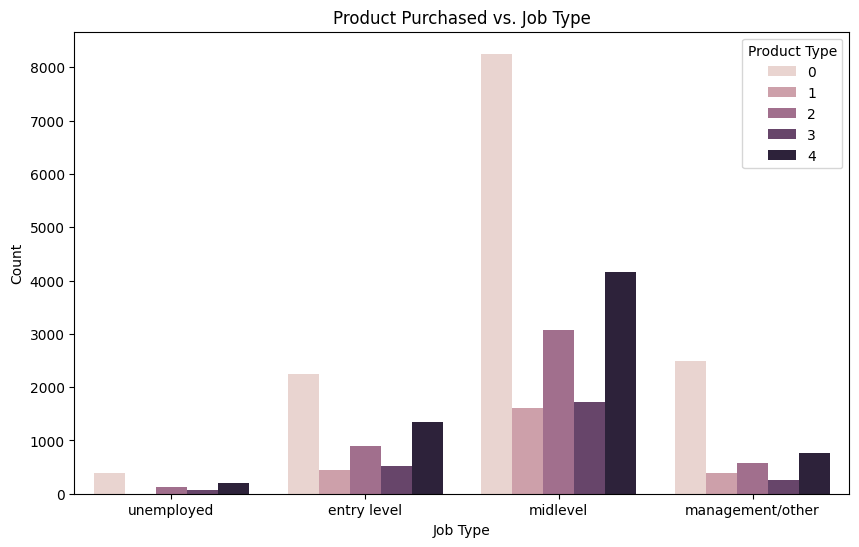

In [12]:
# Chart 4: Relationship between 'job' and 'product'
plt.figure(figsize=(10, 6))
sns.countplot(x='job', hue='product', data=df)
plt.title('Product Purchased vs. Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['unemployed', 'entry level', 'midlevel', 'management/other'])
plt.legend(title='Product Type')
plt.show()

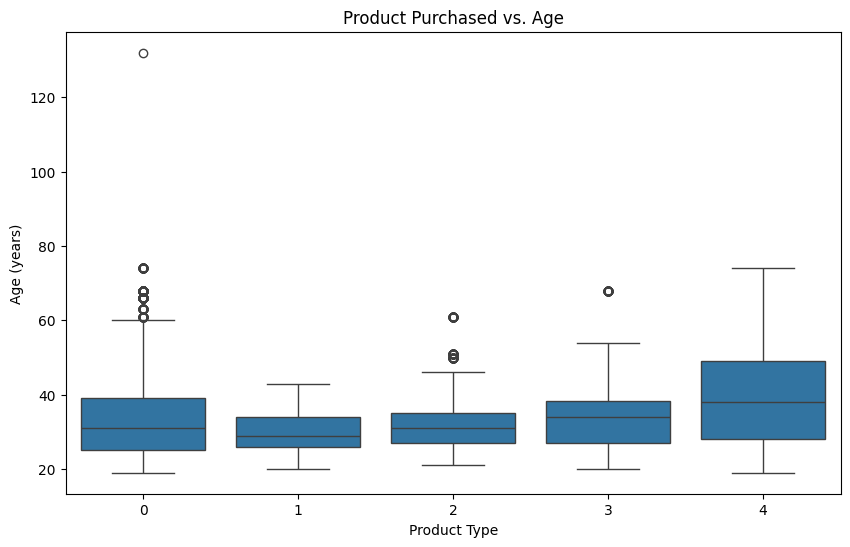

In [11]:
# Chart 3: Relationship between 'age' and 'product'
plt.figure(figsize=(10, 6))
sns.boxplot(x='product', y='age', data=df)
plt.title('Product Purchased vs. Age')
plt.xlabel('Product Type')
plt.ylabel('Age (years)')
plt.show()

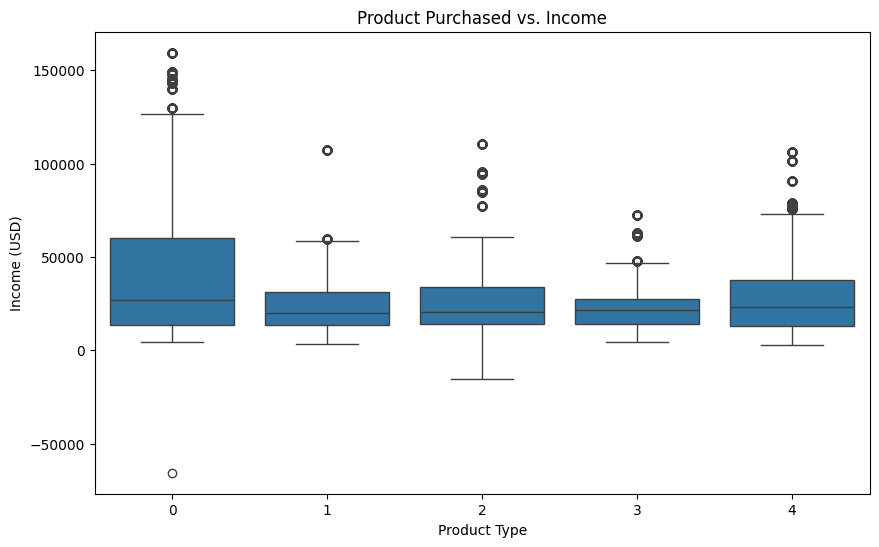

In [10]:
# Chart 2: Relationship between 'income' and 'product'
plt.figure(figsize=(10, 6))
sns.boxplot(x='product', y='income', data=df)
plt.title('Product Purchased vs. Income')
plt.xlabel('Product Type')
plt.ylabel('Income (USD)')
plt.show()

# Step 3: Summarize Your Findings
### 3.1: Are all of the variables useful and applicable to the business need?  (you should reference the target variable and whether other variables have are likely to be correlated with the target)

Write your response below:
Based on the initial data understanding and the EDA charts, we can assess the potential usefulness of the variables in relation to the target variable 'product'.

product (Target Variable): This is the target variable we are trying to predict, so it is essential to the business need. The distribution shows that 'product' type 0 (customer did not answer call) is the most frequent outcome, which is important to consider. answered: This variable is directly related to the 'product' variable as 'product' type 0 is defined by the customer not answering the call. It is likely highly correlated with 'product' and could be useful in distinguishing between customers who answer and those who don't. income: The box plot shows some variation in income across different product types, particularly with higher incomes for product types 2, 3, and 4 compared to 0 and 1. This suggests that income is likely correlated with the product purchased and could be a useful predictor. There are also some outliers in income that might need further investigation or handling. female: The df.info() output shows this as an 'object' type, which needs to be addressed. Once handled, its relationship with 'product' can be explored with a chart to determine its usefulness. age: The box plot of age versus product shows some differences in age distribution across product types, especially with product types 2, 3, and 4 appearing to have slightly higher median ages than 0 and 1. This suggests 'age' could be correlated with 'product'. There are also some outliers in age (ages above 60 and particularly the one around 130) that should be examined. job: The countplot clearly shows different distributions of product types across the job categories. Management/other ('job' type 3) shows a higher proportion of products 2, 3, and 4 compared to other job types. This indicates a likely correlation between 'job' and 'product', making 'job' a useful variable. num_dependents: The df.describe() output shows a limited range of values (1 and 2) for this variable. Its relationship with 'product' would need to be explored with a chart to determine its predictive power. rent and own_res: These binary variables related to housing could potentially be correlated with income and thus indirectly with product purchase. Their individual relationships with 'product' would need to be visualized to confirm their usefulness. new_car: This binary variable has a small number of missing values that need to be handled. Once addressed, its relationship with 'product' can be explored. chk_acct and sav_acct: The countplot for 'chk_acct' shows a clear relationship with 'product', with higher checking account balances being associated with a higher likelihood of purchasing products 2, 3, and 4. 'sav_acct' is also likely to have a similar relationship and appears useful. num_accts: The df.describe() output shows a very large maximum value for this variable (3345), which seems like a significant outlier or data entry error. This variable needs cleaning before its usefulness can be properly assessed. mobile: This binary variable's relationship with 'product' would need to be explored with a chart to determine its usefulness. In summary, 'product' is the target and essential. 'income', 'age', 'job', 'chk_acct', and 'sav_acct' appear to be useful variables with discernible relationships with the target. 'answered' is highly related to the target's definition. 'female', 'num_dependents', 'rent', 'own_res', and 'mobile' require further charting to confirm their usefulness. 'num_accts' and 'income' and 'age' have potential data quality issues (outliers) that need to be addressed.

### 3.2: In what ways could the dataset be improved?  Are there any data quality issues or data types that should be fixed?

Write your response below: 🔧

Based on the initial data understanding and EDA, here are some ways the dataset could be improved and data quality issues/data types that should be fixed:

Handling Missing Values: The new_car column has 2 missing values. These should be addressed, potentially by imputation (e.g., using the mode for a binary variable) or by removing the rows if the number of missing values is very small and won't significantly impact the analysis.
Addressing Outliers:
income: The box plot for income shows several outliers, including negative values and some very high values. These outliers could skew statistical analysis and model training. Strategies for handling them include removal, transformation (e.g., log transformation if the distribution is skewed), or capping/winsorizing the values.
age: The age box plot also shows outliers, particularly the value around 130 years old, which is likely a data entry error. Ages above a certain realistic threshold (e.g., 90 or 100) should be investigated and potentially removed or corrected.
num_accts: The df.describe() output shows an extremely high maximum value (3345) for num_accts, which is a clear outlier and likely an error. This value needs to be investigated and corrected or removed.
Correcting Data Types: The female column is currently of 'object' type. Based on the data dictionary, it should be a binary numerical type (0 or 1). This column needs to be converted to a numeric type (e.g., int64) for proper analysis and modeling.
Investigating Duplicates: The df.duplicated().sum() shows a large number of duplicate rows (29035 out of 29504). This is a significant data quality issue. It's crucial to understand if these are true duplicates (identical records) or if there's a reason for them (e.g., multiple interactions with the same customer recorded as separate rows). If they are true duplicates and represent the same event or customer, they should likely be removed to avoid biasing the analysis. If they represent distinct events, the data collection process should be reviewed.
Categorical Variable Encoding: While not strictly a data quality issue, for modeling purposes, the categorical variables (job, chk_acct, sav_acct, and potentially others like female after fixing the data type) will need to be appropriately encoded (e.g., using one-hot encoding or label encoding) depending on the chosen model.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas

In [17]:
!jupyter nbconvert --to html "assignment_4_ChristensenBryson.ipynb"

[NbConvertApp] Converting notebook assignment_4_ChristensenBryson.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 519389 bytes to assignment_4_ChristensenBryson.html
